In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 加载数据集
train_data = pd.read_csv('train.csv')


In [106]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
train_data.shape

(891, 12)

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


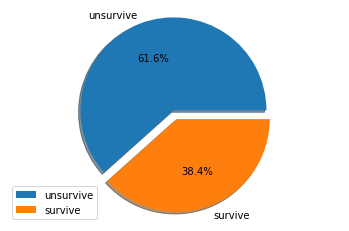

In [110]:
# 查看有多少人丧生，多少人获救
df_counts = train_data['Survived'].value_counts()

plt.pie(df_counts, explode=(0, 0.1),labels=['unsurvive','survive'],
         shadow=True, autopct='%1.1f%%')     
plt.axis('equal')
plt.legend()

In [111]:
# View the number of missing values per column
missing_values = train_data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


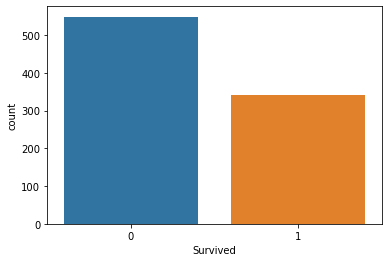

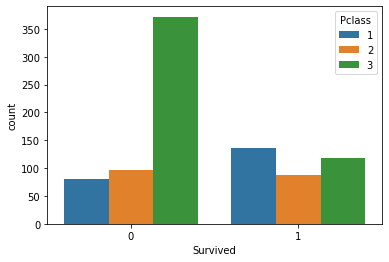

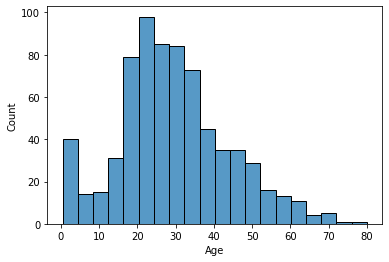

In [112]:
# 数据分析和可视化
sns.countplot(x='Survived', data=train_data)
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.show()

sns.histplot(train_data['Age'].dropna(), kde=False)
plt.show()


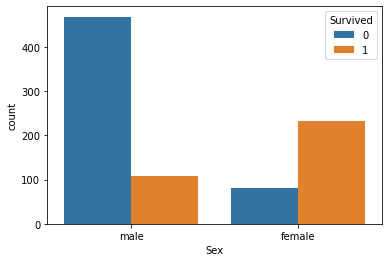

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [113]:
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()
train_data['Survived'].groupby(train_data['Sex']).value_counts() 

In [114]:
# 缺失值处理


train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)



label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])



Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


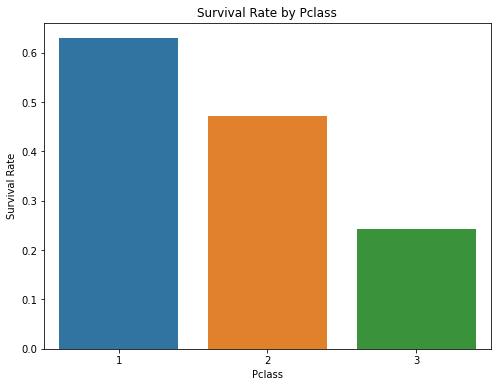

In [120]:
survived_by_pclass = train_data.groupby('Pclass')['Survived'].sum()

# 计算各船舱等级的总人数
total_by_pclass = train_data.groupby('Pclass')['PassengerId'].count()

# 计算各船舱等级的获救比例
survival_rate_by_pclass = survived_by_pclass / total_by_pclass

# 输出各船舱等级的获救比例
print(survival_rate_by_pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.show()

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

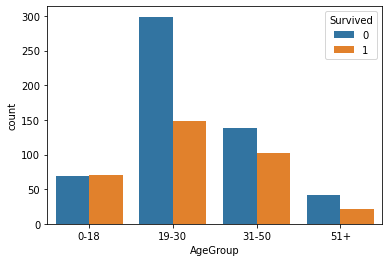

In [118]:
# 将年龄分组
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])

# 可视化年龄组与存活情况的关系
sns.countplot(x='AgeGroup', hue='Survived', data=train_data)


In [115]:
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
X_train = train_data[features]
y_train = train_data['Survived']


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 模型训练和预测
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# 模型评估
accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.8100558659217877
Confusion Matrix:
[[92 13]
 [21 53]]


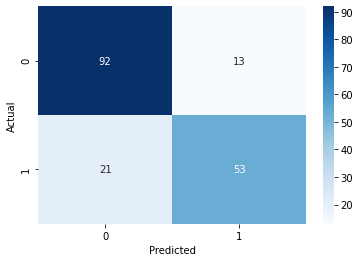

D:\pythonanaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


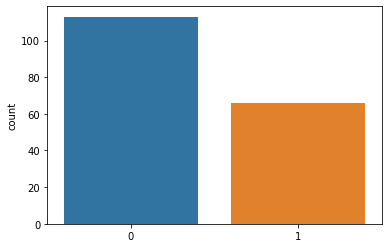

In [117]:
# 预测结果可视化
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.countplot(predictions)
plt.show()